In [2]:
import pandas as pd
import random
import re
import os
import seaborn as sns
from math import pi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from config import config
from gpt_model import get_completion_from_gpt

from format_output import Format_output

# Set the ROOT_DIR to your repository root.
ROOT_DIR = os.path.dirname(os.path.abspath(''))

# Set the DATA_DIR to the directory where your data resides.
DATA_DIR = os.path.join(ROOT_DIR, 'data/')

# Load the uploaded CSV files
anomaly_dataset_path = os.path.join(DATA_DIR, "deepLoglizer_data/hdfs_annotations.csv")

# Read the Excel file
df = pd.read_csv(anomaly_dataset_path)

# Assuming the log messages are in the third column
hdfs_log_lines = df.iloc[:, 2]

save_dir_path = os.path.join(ROOT_DIR, 'results')
output_file_path = os.path.join(save_dir_path, "hdfs_log_labels.csv")

In [3]:
print(len(hdfs_log_lines))

246


In [4]:
# Step 1: Generate log labels for HDFS logs
output_lines = []
counter_1 = 0

for log in hdfs_log_lines:
    prompt = f"""
    You will be provided with a log message delimited by <MSG> and </MSG>. 
    The log texts describe various system events in a distributed file system. 
    Your task is to understand the meaning of the log message and classify the log message. 
    Classify the log message as "Normal" or "Anomaly" based on its content.
    Provide the result in the following format: <TPL>Label</TPL>.
    Never print an explanation or description. Print only the result.
    Here is the input log message: <MSG>{log}</MSG>
    """

    # Replace get_completion_from_gpt with your LLM function
    response = get_completion_from_gpt(prompt)

    output_lines.append(response.strip())

    if counter_1 % 10 == 0:
        print(f'{counter_1}: {response}')
        
    counter_1 += 1


0: <TPL>Anomaly</TPL>
10: <TPL>Normal</TPL>
20: <TPL>Normal</TPL>
30: <TPL>Normal</TPL>
40: <TPL>Normal</TPL>
50: <TPL>Normal</TPL>
60: <TPL>Normal</TPL>
70: <TPL>Normal</TPL>
80: <TPL>Normal</TPL>
90: <TPL>Anomaly</TPL>
100: <TPL>Normal</TPL>
110: <TPL>Normal</TPL>
120: <TPL>Normal</TPL>
130: <TPL>Normal</TPL>
140: <TPL>Normal</TPL>
150: <TPL>Normal</TPL>
160: <TPL>Normal</TPL>
170: <TPL>Normal</TPL>
180: <TPL>Normal</TPL>
190: <TPL>Normal</TPL>
200: <TPL>Normal</TPL>
210: <TPL>Normal</TPL>
220: <TPL>Normal</TPL>
230: <TPL>Normal</TPL>
240: <TPL>Normal</TPL>


In [5]:
# Save the results to a file
with open(output_file_path, "w") as output_file:
    output_file.write("Label\n")
    output_file.write("\n".join(output_lines))

print(f"Log labels saved to {output_file_path}")

Log labels saved to /Users/navneetsharma/Documents/NMBU/MS Data Science @ NMBU/Master's Thesis/semantic_log_parsing/results/hdfs_log_labels.csv


In [6]:
# convert raw output into formatted file 
Format_output.remove_TPL_from_output(output_file_path, output_file_path)

Processed output saved to: /Users/navneetsharma/Documents/NMBU/MS Data Science @ NMBU/Master's Thesis/semantic_log_parsing/results/hdfs_log_labels.csv


In [7]:
# File paths
processed_hdfs_labels_filepath = output_file_path

# Load ground truth data
ground_truth_hdfs = pd.read_csv(anomaly_dataset_path)
ground_truth_hdfs_lables = ground_truth_hdfs['Label'].tolist()

output_directory = os.path.dirname(processed_hdfs_labels_filepath)


# Load processed output data
with open(processed_hdfs_labels_filepath, 'r') as processed_file:
    processed_hdfs_labels = [line.strip() for line in processed_file.readlines()]
 

# Ensure the lists are of the same length for comparison
min_length = min(len(ground_truth_hdfs_lables), len(processed_hdfs_labels))
ground_truth_hdfs_lables = ground_truth_hdfs_lables[:min_length]
processed_hdfs_labels = processed_hdfs_labels[:min_length]

# Calculate evaluation metrics for processed_log_templates
precision = precision_score(ground_truth_hdfs_lables, processed_hdfs_labels, average='weighted', zero_division=0)
recall = recall_score(ground_truth_hdfs_lables, processed_hdfs_labels, average='weighted', zero_division=0)
f1 = f1_score(ground_truth_hdfs_lables, processed_hdfs_labels, average='weighted', zero_division=0)

# Print evaluation metrics for processed_log_templates
print(f"HDFS Anomaly Detection Precision: {precision * 100:.2f}%")
print(f"HDFS Anomaly Detection Recall: {recall * 100:.2f}%")
print(f"HDFS Anomaly Detection F1-Score: {f1 * 100:.2f}%")

HDFS Anomaly Detection Precision: 89.80%
HDFS Anomaly Detection Recall: 86.99%
HDFS Anomaly Detection F1-Score: 88.34%


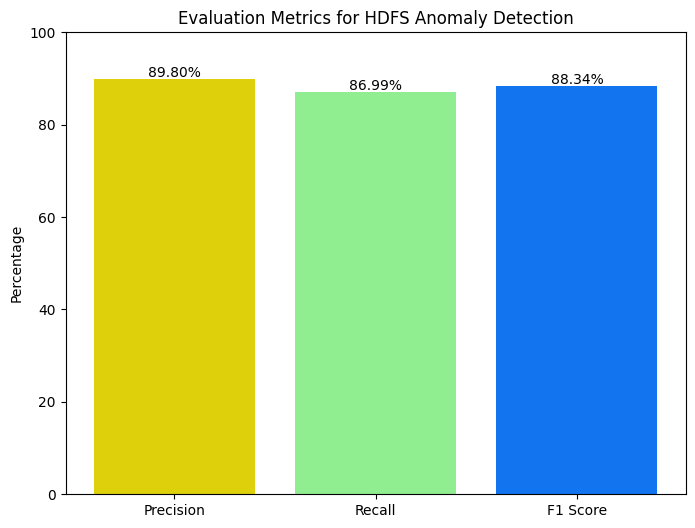

In [22]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision * 100, recall * 100, f1 * 100]


# Defining light colors for the bars
colors = ['#ded10c', '#90ee90', '#1374f0']  # Light blue, light green, light pink

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors)

# Adding title and labels
plt.title('Evaluation Metrics for HDFS Anomaly Detection')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Setting y-axis limit for better readability

# Display the values on the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.2f}%", color='black', ha='center')


plt.savefig(os.path.join(output_directory, 'HDFS_labels_evaluation.png'), bbox_inches='tight')
# Display the plot
plt.show()
